In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv

In [33]:
alpha_list = []
beta_list = []

psi_err_array = []
V_err_array = []
timeStep_array = []
numIter_array = []

first_iteration = 1

with open('params_RKF45.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        
        alpha = row['alpha']
        beta = row['beta']
        V_err = row['V_err']
        psi_err = row['psi_err']
        num_timeSteps = row['num_timesteps']
        num_iter = row['num_iter']

        if alpha not in alpha_list:
            if (first_iteration == 0):
                psi_err_array.append(psi_err_list)
                V_err_array.append(V_err_list)
                timeStep_array.append(timeStep_list)
                numIter_array.append(numIter_list)

            alpha_list.append(alpha)
                        
            psi_err_list = []
            V_err_list = []
            timeStep_list = []
            numIter_list = []
            
            
        if beta not in beta_list:
            beta_list.append(beta)
                        
        psi_err_list.append(psi_err)
        V_err_list.append(V_err)
        timeStep_list.append(num_timeSteps)
        numIter_list.append(num_iter)

        first_iteration = 0
        
      
beta = np.asarray(beta_list, dtype=np.float32)
alpha = np.asarray(alpha_list, dtype=np.float32)

psi = np.asarray(psi_err_array, dtype=np.float32)
V = np.asarray(V_err_array, dtype=np.float32)
TS = np.asarray(timeStep_array, dtype=np.float32)
NI = np.asarray(numIter_array, dtype=np.float32)
        


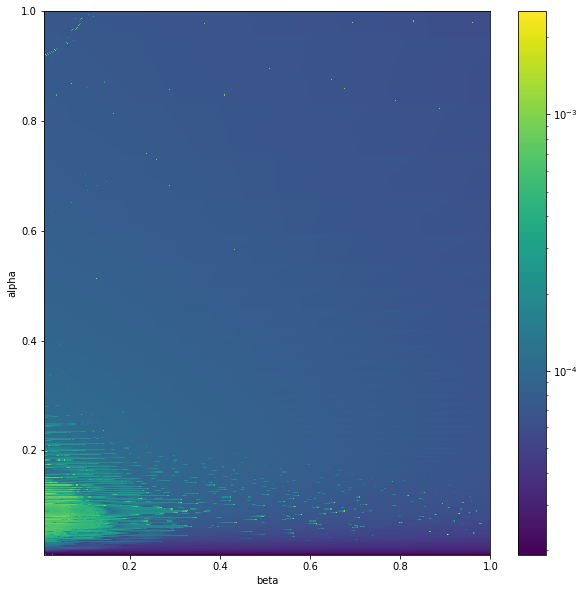

In [34]:
Z = psi

smooth_fig = plt.figure(figsize=(10.00,10.00))

n_y = alpha.shape[0]
n_x = beta.shape[0]

X, Y = np.meshgrid(beta, alpha)

plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
#plt.pcolor(X,Y,Z)

plt.colorbar()

#plt.title("absolute error of psi")

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('analysis_RKF45_psi.png', format='png',dpi=300)


plt.show()


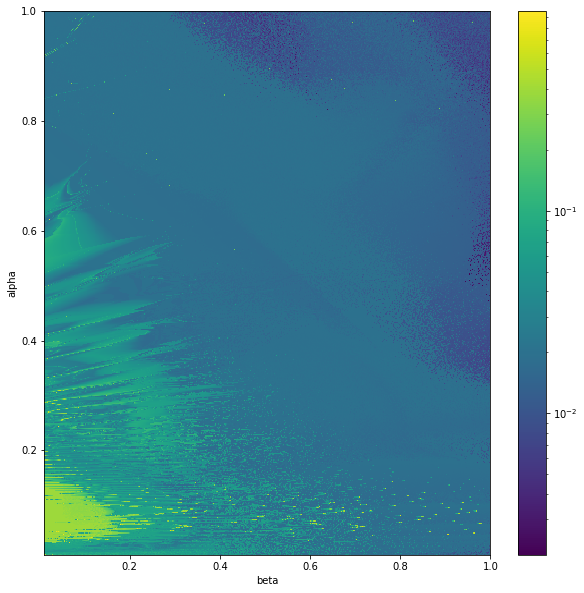

In [35]:
Z = V

smooth_fig = plt.figure(figsize=(10.00,10.00))

n_y = alpha.shape[0]
n_x = beta.shape[0]

X, Y = np.meshgrid(beta, alpha)

#plt.pcolor(X, Y, Z)
#plt.pcolor(X, Y, Z, vmin=Z.min(), vmax=20*Z.min())
plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

plt.colorbar()

#plt.title("absolute error of the velocity")

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('analysis_RKF45_V.png', format='png',dpi=300)


plt.show()


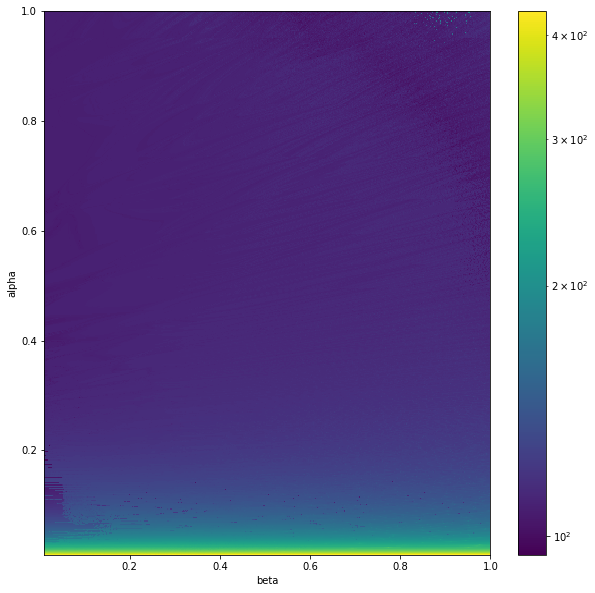

In [36]:
Z = TS

smooth_fig = plt.figure(figsize=(10.00,10.00))

n_y = alpha.shape[0]
n_x = beta.shape[0]-1

X, Y = np.meshgrid(beta, alpha)

#plt.pcolor(X, Y, Z)
plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))


plt.colorbar()

#plt.title("number of required timesteps")

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('analysis_RKF45_TS.png', format='png',dpi=300)


plt.show()


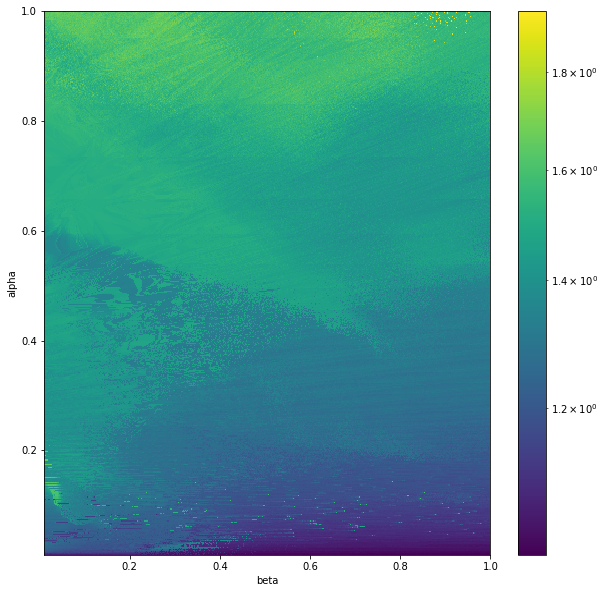

In [37]:
Z = NI

smooth_fig = plt.figure(figsize=(10.00,10.00))

n_y = alpha.shape[0]
n_x = beta.shape[0]

X, Y = np.meshgrid(beta, alpha)

#plt.pcolor(X, Y, Z)
plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

plt.colorbar()

#plt.title("average number of required iterations to find the next timestep")

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('analysis_RKF45_NI.png', format='png',dpi=300)


plt.show()


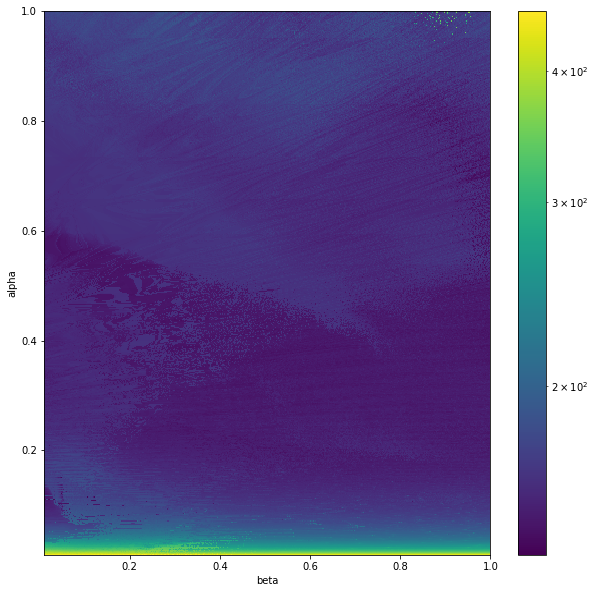

In [38]:
Z = NI * TS

smooth_fig = plt.figure(figsize=(10.00,10.00))

n_y = alpha.shape[0]
n_x = beta.shape[0]

X, Y = np.meshgrid(beta,alpha)

#plt.pcolor(X, Y, Z)
plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

plt.colorbar()

#plt.title("Number of evaluations of the right hand-side of the DAE")

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('analysis_RKF45_NITS.png', format='png',dpi=300)


plt.show()


In [39]:
NITS = NI*TS
k = np.argmax(NITS)
n_y = alpha.shape[0]
n_x = beta.shape[0]
i = int(np.floor(k / n_y))
j = k % n_y
print("minimum number of applications of the RKF45 scheme is ", NITS[i,j], "for alpha = ",alpha[j],"and beta = ",beta[i])
print("at this point, the error in V is ",V[i,j], "and in psi is ",psi[i,j])


minimum number of applications of the RKF45 scheme is  455.9982 for alpha =  0.309579 and beta =  0.01
at this point, the error in V is  0.0541433 and in psi is  1.90977e-05


In [40]:
NITS = NI*TS
k = np.argmin(V)
n_x = alpha.shape[0]
n_y = beta.shape[0]
i = int(np.floor(k / n_y))-14
j = k % n_y-28
print("minimum error in velocity is ", V[i,j], "for alpha = ",alpha[j],"and beta = ",beta[i])
print("at this point, the number of applications of the RKF45 scheme is ",NITS[i,j], "and the error in psi is ",psi[i,j])


minimum error in velocity is  0.0134541 for alpha =  0.900802 and beta =  0.50004
at this point, the number of applications of the RKF45 scheme is  156.00032 and the error in psi is  6.76574e-05


In [98]:
NITS = NI*TS
k = np.argmin(psi)
n_x = alpha.shape[0]
n_y = beta.shape[0]
i = int(np.floor(k / n_y))
j = k % n_y
print("minimum error in psi is", psi[i,j], "for alpha =",alpha[j],"and beta =",beta[i])
print("at this point, the number of applications of the RKF45 scheme is ",NITS[i,j], "and the error in the velocity is ",V[i,j])



minimum error in psi is 0.0100448 for alpha = 0.978176 and beta = 0.700421
at this point, the number of applications of the RKF45 scheme is  544.0012 and the error in the velocity is  0.013341


In [100]:
i = int(0.9 * 500)    # beta
j = int(0.5 * 500)    # alpha
print("V error:",V[i,j],"  psi error:",psi[i,j],"  number of iterations:",NITS[i,j])

V error: 0.00250977   psi error: 3.42813e-06   number of iterations: 72454.84


In [ ]:
convert -trim analysis_BDF12_NITS.png analysis_BDF12_NITS.png
convert -trim analysis_BDF12_V.png analysis_BDF12_V.png
convert -trim analysis_BDF12_TS.png analysis_BDF12_TS.png
convert -trim analysis_BDF12_psi.png analysis_BDF12_psi.png
convert -trim analysis_BDF12_NI.png analysis_BDF12_NI.png

convert -trim analysis_BDF23_NITS.png analysis_BDF23_NITS.png
convert -trim analysis_BDF23_V.png analysis_BDF23_V.png
convert -trim analysis_BDF23_TS.png analysis_BDF23_TS.png
convert -trim analysis_BDF23_psi.png analysis_BDF23_psi.png
convert -trim analysis_BDF23_NI.png analysis_BDF23_NI.png

convert -trim analysis_RKF45_NITS.png analysis_RKF45_NITS.png
convert -trim analysis_RKF45_V.png analysis_RKF45_V.png
convert -trim analysis_RKF45_TS.png analysis_RKF45_TS.png
convert -trim analysis_RKF45_psi.png analysis_RKF45_psi.png
convert -trim analysis_RKF45_NI.png analysis_RKF45_NI.png
